In [ ]:
import numpy as np

a = np.matrix(' 1 0; 1 3; 1 1')
b=np.matrix('5; 0; 0')
aT= a.T

print(a)
print(aT)
print(b)

[[1 0]
 [1 3]
 [1 1]]
[[1 1 1]
 [0 3 1]]
[[5]
 [0]
 [0]]


In [ ]:
aTa = np.matmul(aT,a)
print(aTa)

[[ 3  4]
 [ 4 10]]


In [ ]:
aTainv = np.linalg.inv(aTa)
print(aTainv)

[[ 0.71428571 -0.28571429]
 [-0.28571429  0.21428571]]


In [ ]:
a_i = np.matmul(aTainv,aT)
ii = np.matmul(a_i, a)
print(ii)

[[ 1.00000000e+00 -2.22044605e-16]
 [-2.77555756e-17  1.00000000e+00]]


In [ ]:
aTb= np.matmul(aT,b)
print(aTb)

[[5]
 [0]]


In [ ]:
xsol=np.matmul(aTainv,aTb)
print(xsol)

[[ 3.57142857]
 [-1.42857143]]


---

In [ ]:
a = np.matrix(' 1 -2 5;  -1 1 2')
b=np.matrix('9; 1')
aT= a.T

print( 'A ')
print(a)
print( '--'*15)
print( 'A^T ')

print(aT)
print( '--'*15)
print( ' B')

print(b)

A 
[[ 1 -2  5]
 [-1  1  2]]
------------------------------
A^T 
[[ 1 -1]
 [-2  1]
 [ 5  2]]
------------------------------
 B
[[9]
 [1]]


In [ ]:
aaT= np.matmul(a,aT)
print(aaT)

[[30  7]
 [ 7  6]]


In [ ]:
aaTinv = np.linalg.inv(aaT)
print(aaTinv)

[[ 0.04580153 -0.05343511]
 [-0.05343511  0.22900763]]


In [ ]:
aaTinvb = np.matmul(aaTinv, b)
print(aaTinvb)

[[ 0.35877863]
 [-0.2519084 ]]


In [ ]:
ainv = np.matmul(aT,aaTinvb)
print(ainv)

[[ 0.61068702]
 [-0.96946565]
 [ 1.29007634]]


Linear and Multiple Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [ ]:
#Loading Data
from google.colab import files
uploaded = files.upload()

Saving student_scores.csv to student_scores.csv


In [ ]:
score=pd.read_csv("student_scores.csv")
score.shape

(25, 2)

In [ ]:
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Axes: >

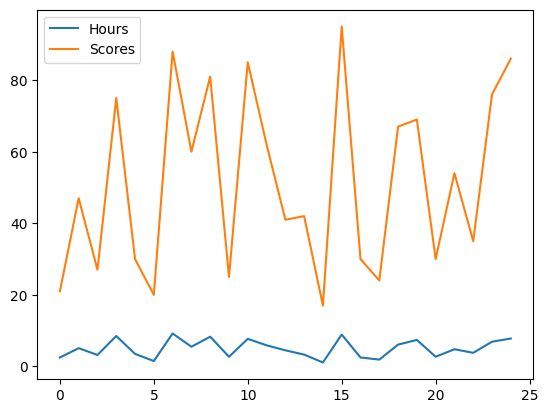

In [ ]:
# score.plot
score.plot()

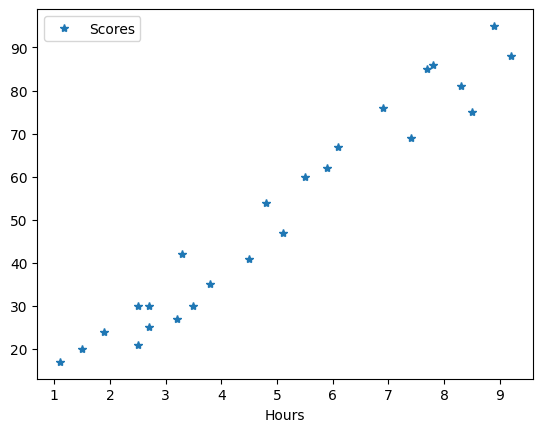

In [ ]:
# score.plot
score.plot(x="Hours", y="Scores", style='*')
plot.show()

In [ ]:
# fit linear regression for this data

X=score.iloc[:,:-1].values
y=score.iloc[:,1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression() # created object
reg.fit(X,y)
#it fit the data

LinearRegression()

In [ ]:
print(reg.intercept_)

2.48367340537321


In [ ]:
print(reg.coef_)

[9.77580339]


In [ ]:
y_pred = reg.predict(X)

In [ ]:
df=pd.DataFrame({'Actual':y, 'Predicted':y_pred})

In [ ]:
df

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985
5,20,17.147378
6,88,92.421065
7,60,56.250592
8,81,83.622842
9,25,28.878343


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: Indicates how well the model predicts the test data.

In [ ]:
print('Mean square error(MSE) : %.2f ' % mean_squared_error(y,y_pred))

Mean square error(MSE) : 28.88 


In [ ]:
print('R squred score) : %.2f ' % r2_score(y,y_pred))

R squred score) : 0.95 


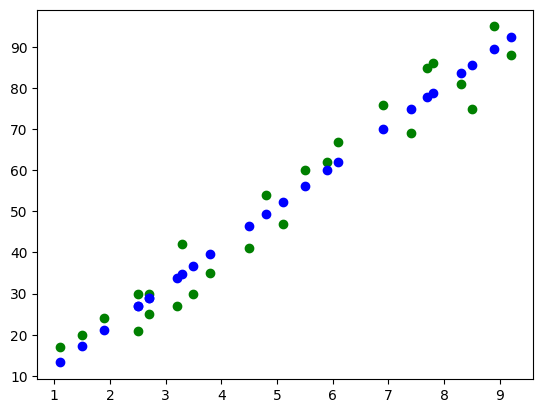

In [ ]:
plot.scatter(X,y, color='green')
plot.scatter(X,y_pred, color='blue')
plot.show()

Polynomial regression model with multiple features
--

$ y = 2 \times x^2 + 3 \times x^2 + $ noise

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2 * x_1**2 + 3 * x_1 + 2 + np.random.randn(100, 1) * 20


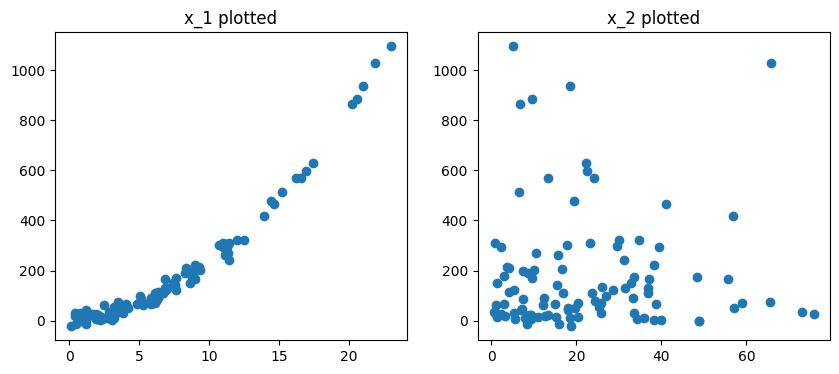

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

Store the feature in pandas dataframe

In [ ]:
df = pd.DataFrame({"x_1":x_1.reshape(100,), "x_2":x_2.reshape(100,), "y":y.reshape(100,)}, index=range(0,100))
df

,x_1,x_2,y
0,16.243454,13.413857,570.412369
1,6.117564,36.735231,111.681987
2,5.281718,12.104749,62.392124
3,10.729686,17.807356,303.538953
4,8.654076,32.847355,151.109269
...,...,...,...
95,0.773401,48.823150,-0.430738
96,3.438537,18.069578,44.308720
97,0.435969,12.608466,19.383456
98,6.200008,24.328550,78.371729


Define training and the test data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

**train_test_split** helps us split our data into a training and a test dataset:

In [ ]:
X, y = df[["x_1", "x_2"]], df["y"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)


Lets create and fit out model

In [ ]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

np.float64(20.937707839078772)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('R squared score) : %.2f ' % r2_score(y_test,poly_reg_y_predicted))

R squared score) : 0.98 


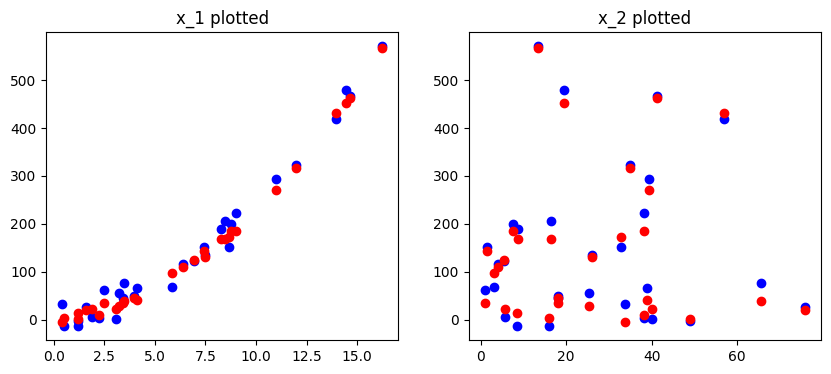

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(X_test[:,0], y_test, color='blue')
axes[0].scatter(X_test[:,0], poly_reg_y_predicted, color='red')
axes[1].scatter(X_test[:,1], y_test, color='blue')
axes[1].scatter(X_test[:,1], poly_reg_y_predicted, color='red')

axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

Now let’s create a linear regression model as well, so we can compare the performance of the two models:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

np.float64(62.302487453878506)

In [ ]:
print('R squared score) : %.2f ' % r2_score(y_test,lin_reg_y_predicted))

R squared score) : 0.84 


In [ ]:
lin_reg_model.coef_


array([43.73176255, -0.53140809])

In [ ]:
 lin_reg_model.intercept_

np.float64(-117.07280081594811)


Linear regression model takes this  form

$  y= \alpha_0  + \alpha_1 x_1 + \alpha_2 x_2 $

on the other hand, **poly_feautres** contains new features as well,  created out of $x_1$ $x_2$


$ y = \alpha_0 + \alpha_1 x_1 + \alpha_2 x_2 + \alpha_3 x_1^2 ++ \alpha_4 x_2^2 + \alpha_5 x_1 x_2$     

This is because **poly.fit_transform(X)** added three new features to the original two ($x_1$ and $x_2$): $x_1^2$, $x_1^2$ and $x_1 x_2$


when two features are multiplied by each other, it's called an interaction term.

* An interaction term accounts for the fact that one variable's value may depend on another variable's value. **poly.fit_transform()** automatically created this interaction term


In [ ]:
poly_reg_model.coef_ # these give us alpha terms

array([ 3.61945509, -1.0859955 ,  1.89905813,  0.0207338 ,  0.01300394])

---
Lets try to model using 5 degree of freedom

R squared score) : 0.95 


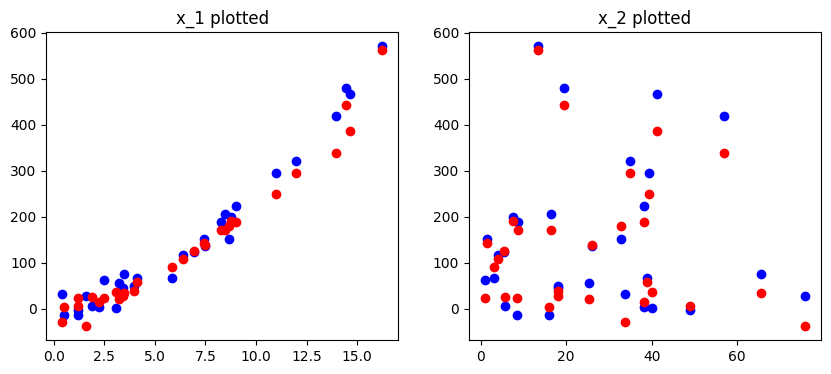

In [ ]:
X, y = df[["x_1", "x_2"]], df["y"]
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse


from sklearn.metrics import mean_squared_error, r2_score
print('R squared score) : %.2f ' % r2_score(y_test,poly_reg_y_predicted))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(X_test[:,0], y_test, color='blue')
axes[0].scatter(X_test[:,0], poly_reg_y_predicted, color='red')
axes[1].scatter(X_test[:,1], y_test, color='blue')
axes[1].scatter(X_test[:,1], poly_reg_y_predicted, color='red')

axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

---

R squared score) : 0.98 
Mean Squared Error (Ridge with Polynomial Features): 438.41308035178315


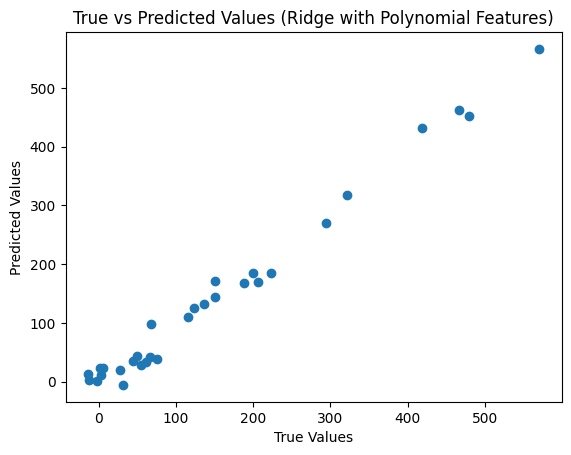

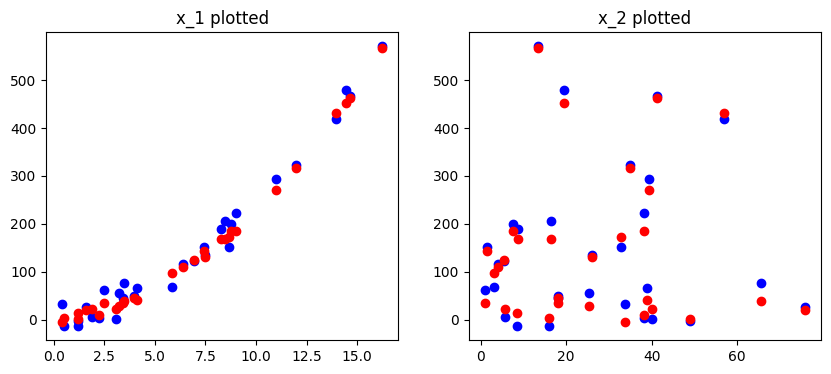

R squared score) : 0.98 


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Combine x_1 and x_2 into a single feature matrix
X = np.hstack([x_1, x_2])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # Create polynomial features up to degree 2
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Apply Ridge regression on polynomial features
ridge = Ridge(alpha=0.1)  # You can adjust alpha for regularization strength
ridge.fit(X_poly_train, y_train)

# Make predictions
y_pred = ridge.predict(X_poly_test)

from sklearn.metrics import mean_squared_error, r2_score
print('R squared score) : %.2f ' % r2_score(y_test,y_pred))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Ridge with Polynomial Features): {mse}")

# Plot the true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Ridge with Polynomial Features)")
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(X_test[:,0], y_test, color='blue')
axes[0].scatter(X_test[:,0], y_pred, color='red')
axes[1].scatter(X_test[:,1], y_test, color='blue')
axes[1].scatter(X_test[:,1], y_pred, color='red')

axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()


from sklearn.metrics import mean_squared_error, r2_score
print('R squared score) : %.2f ' % r2_score(y_test,y_pred))



 Choosing the right value of alpha is crucial because:

Small alpha: Less regularization, and the model becomes similar to ordinary linear regression.

Large alpha: More regularization, shrinking the coefficients more and potentially underfitting the data.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Best alpha (lambda) value found by cross-validation: 13000.0
Mean Squared Error (with best alpha): 701.6612077360068


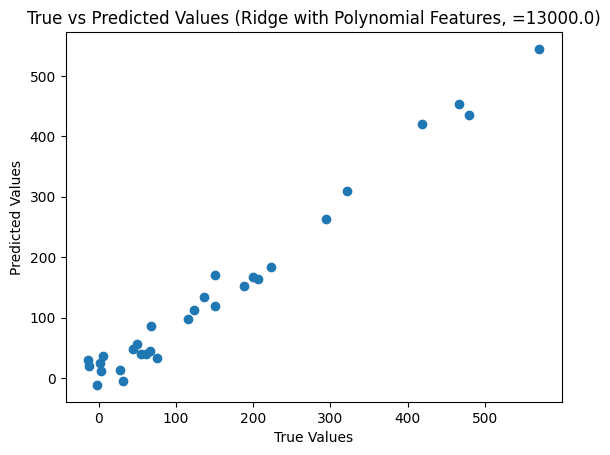

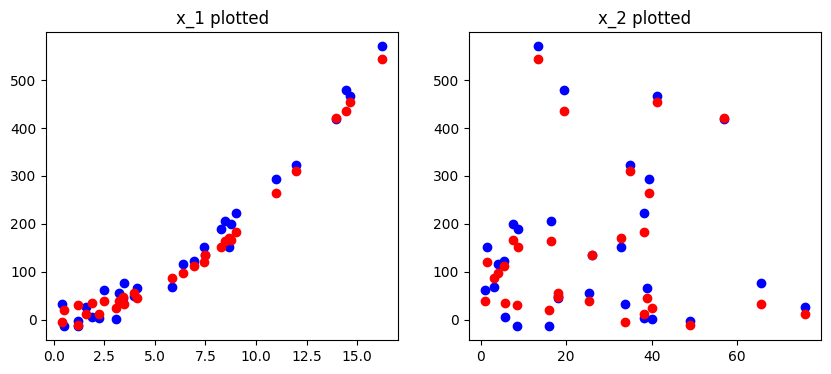

R squared score) : 0.97 


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recreate the dataset
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2 * x_1**2 + 3 * x_1 + 2 + np.random.randn(100, 1) * 20

# Combine x_1 and x_2 into a single feature matrix
X = np.hstack([x_1, x_2])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of alpha values to try
alphas = [0.0000001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # Create polynomial features up to degree 2
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


# Apply Polynomial Features
poly = PolynomialFeatures(degree=3)  # Create polynomial features up to degree 2
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# List of alpha values to test
alphas = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,5000, 10000.0, 11000, 12000, 13000,14000,15000,20000, 150000, 10000000000.0]

# Apply Ridge regression with cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)  # store_cv_values=True stores cross-validation errors
ridge_cv.fit(X_poly_train, y_train)

# Get the best alpha value
best_alpha = ridge_cv.alpha_
print(f"Best alpha (lambda) value found by cross-validation: {best_alpha}")

# Make predictions using the best alpha
y_pred = ridge_cv.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (with best alpha): {mse}")

# Plot the true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted Values (Ridge with Polynomial Features, ={best_alpha})")
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(X_test[:,0], y_test, color='blue')
axes[0].scatter(X_test[:,0], y_pred, color='red')
axes[1].scatter(X_test[:,1], y_test, color='blue')
axes[1].scatter(X_test[:,1], y_pred, color='red')

axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
print('R squared score) : %.2f ' % r2_score(y_test,y_pred))


---
#Now do the Lasso regression

Best alpha value found by cross-validation: 4.094915062380419
Mean Squared Error (with best alpha): 463.4999408840006


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


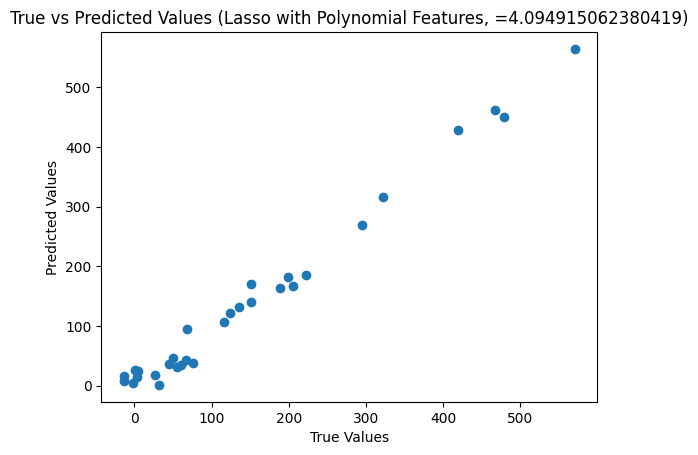

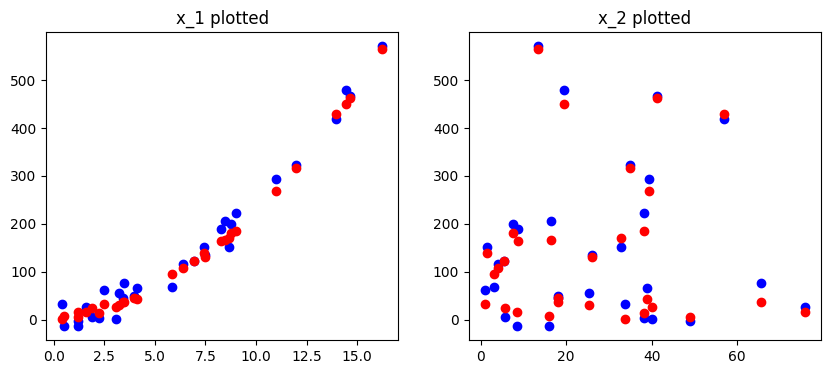

R squared score) : 0.98 


In [ ]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-10, 10, 50)

poly = PolynomialFeatures(degree=2)  # Create polynomial features
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Apply Lasso regression with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)  # 5-fold cross-validation, increase max_iter for convergence
lasso_cv.fit(X_poly_train, y_train)

# Get the best alpha value
best_alpha = lasso_cv.alpha_
print(f"Best alpha value found by cross-validation: {best_alpha}")

# Make predictions using the best alpha
y_pred = lasso_cv.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (with best alpha): {mse}")

# Plot the true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted Values (Lasso with Polynomial Features, ={best_alpha})")
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(X_test[:,0], y_test, color='blue')
axes[0].scatter(X_test[:,0], y_pred, color='red')
axes[1].scatter(X_test[:,1], y_test, color='blue')
axes[1].scatter(X_test[:,1], y_pred, color='red')

axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()



from sklearn.metrics import mean_squared_error, r2_score
print('R squared score) : %.2f ' % r2_score(y_test,y_pred))

---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.286e+02, tolerance: 6.606e-01
  model = cd_fast.enet_coordinate_descent(


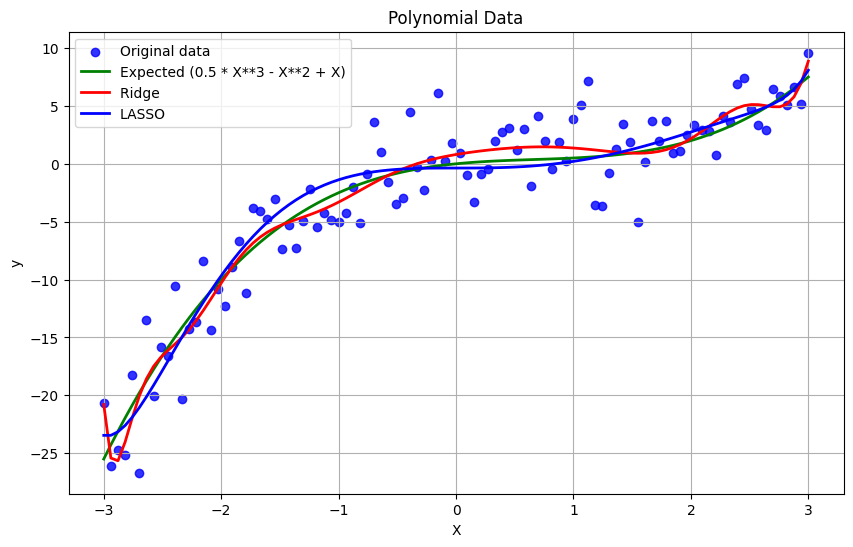

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Generate Polynomial Data
np.random.seed(1)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + X + np.random.normal(0, 3, X.shape)
# Polynomial relationship with noise

#Fit Ridge and Lasso Regression Models
degree = 15  # Degree of the polynomial
alpha = 0.5  # Regularization strength

# Polynomial feature
poly = PolynomialFeatures(degree)

# Ridge
ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
ridge_reg.fit(X, y)
y_ridge_pred = ridge_reg.predict(X)

# Lasso
lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
lasso_reg.fit(X, y)
y_lasso_pred = lasso_reg.predict(X)

plt.figure(figsize=(10, 6))

# Original
plt.scatter(X, y, color='blue', label='Original data', alpha=0.8)

# Expected without noise
true_y = 0.5 * X**3 - X**2 + X
plt.plot(X, true_y, color='green', linewidth=2, label='Expected (0.5 * X**3 - X**2 + X)')

# Ridge
plt.plot(X, y_ridge_pred, color='red', linewidth=2, label='Ridge ')

# Lasso
plt.plot(X, y_lasso_pred, color='blue', linewidth=2, label='LASSO')

plt.title("Polynomial Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


You've got it: $(A^\top A)^{-1}A^\top$ is the **left** inverse in the tall, full-column-rank (overdetermined) case.

# Left

Let $A\in\mathbb{R}^{m\times n}$ with $m>n$ and $\mathrm{rank}(A)=n$.

* matrix $A^{+}=(A^\top A)^{-1}A^\top$ has shape $n\times m$.
* Then

  $$
  \underbrace{A^{+}A}_{n\times n}=(A^\top A)^{-1}\,A^\top A=I_n
  $$

  so it multiplies $A$ on the **left** to give the identity → **left inverse**.
* In contrast,

  $$
  \underbrace{AA^{+}}_{m\times m}=A(A^\top A)^{-1}A^\top
  $$

  is the **orthogonal projector** onto $\mathrm{col}(A)$, not $I_m$ (unless $A$ is square/invertible).

# Right

 $A\in\mathbb{R}^{m\times n}$ with $n>m$ and $\mathrm{rank}(A)=m$ (underdetermined),

$$
A^{+}=A^\top(AA^\top)^{-1}\quad\Rightarrow\quad AA^{+}=I_m
$$

so $A$ has a **right** inverse.



* **Left inverse**: the inverse matrix sits on the **left** ($L A=I$) → tall, full column rank.
* **Right inverse**: it sits on the **right** ($A R=I$) → wide, full row rank.


    > Left pseudoinverse  $ L = (A^T A)^{-1} A^T $

    > Right pseudoinverse $ R = A^T (A A^T)^{-1} $
    
    > True inverse        $ invA = A^{-1} $




In [ ]:


import numpy as np

np.set_printoptions(precision=4, suppress=True)

#  3x3 matrix
A = np.array([[ 3.,  1., -1.],
              [ 2.,  4.,  1.],
              [-1.,  2.,  5.]], dtype=float)

# Check invertibility
detA = np.linalg.det(A)
condA = np.linalg.cond(A)
print("det(A) =", detA, "  cond(A) ≈", condA)

# Left / Right pseudoinverses (full-rank square -> both equal A^{-1})
L = np.linalg.inv(A.T @ A) @ A.T
R = A.T @ np.linalg.inv(A @ A.T)
invA = np.linalg.inv(A)

# Identities
I_left  = L @ A
I_right = A @ R
I_true1 = invA @ A
I_true2 = A @ invA

print("\nLeft pseudoinverse L = (A^T A)^{-1} A^T:\n", L)
print("-"*50)
print("\nRight pseudoinverse R = A^T (A A^T)^{-1}:\n", R)
print("-"*50)
print("\nTrue inverse A^{-1}:\n", invA)
print("="*50)

print("\nL * A (should be I):\n", I_left)
print("\nA * R (should be I):\n", I_right)
print("\nA^{-1} * A (should be I):\n", I_true1)
print("\nA * A^{-1} (should be I):\n", I_true2)

# Show that L, R, invA are numerically the same
print("\n ||L - A^{-1}||_F =", np.linalg.norm(L - invA, 'fro'))
print("||R - A^{-1}||_F =", np.linalg.norm(R - invA, 'fro'))
print("||L - R||_F      =", np.linalg.norm(L - R, 'fro'))
print("="*50)
# Multiply all three identity results (still identity)
I_product = I_left @ I_right @ I_true1
print("\n(I_left) (I_right) (A^{-1}A) product:\n", I_product)


det(A) = 35.00000000000001   cond(A) ≈ 5.145165057000179

Left pseudoinverse L = (A^T A)^{-1} A^T:
 [[ 0.5143 -0.2     0.1429]
 [-0.3143  0.4    -0.1429]
 [ 0.2286 -0.2     0.2857]]
--------------------------------------------------

Right pseudoinverse R = A^T (A A^T)^{-1}:
 [[ 0.5143 -0.2     0.1429]
 [-0.3143  0.4    -0.1429]
 [ 0.2286 -0.2     0.2857]]
--------------------------------------------------

True inverse A^{-1}:
 [[ 0.5143 -0.2     0.1429]
 [-0.3143  0.4    -0.1429]
 [ 0.2286 -0.2     0.2857]]

L * A (should be I):
 [[ 1. -0.  0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]

A * R (should be I):
 [[ 1. -0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]

A^{-1} * A (should be I):
 [[ 1. -0. -0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]

A * A^{-1} (should be I):
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]

 ||L - A^{-1}||_F = 3.455541296989643e-16
||R - A^{-1}||_F = 1.8824747269678055e-16
||L - R||_F      = 3.3190841028655766e-16

(I_left) (I_right) (A^{-1}A) product:
 [[ 1. -0. -0.]
 [ 0.  1. -0.]
 [